# Desafío - Máquinas de Soporte Vectorial

Requerimientos

- Para esta sesión trabajaremos con la base de datos sobre cáncer mamario de Wisconsin. El objetivo es desarrollar un Clasificador mediante Máquinas de Soporte de Vectores que predica de forma adecuada en base a una serie de atributos sobre la composición del núcleo de una
célula mamaria. Para más detalles técnicos asociados a la base de atos, pueden hacer click en el​ link​.

# 1) Ejercicio 1: Preparar el ambiente de trabajo

- Importe todas las librerías a utilizar.
- Fije los parámetros de los gráficos con ​plt.Rcparams​.
- Excluya las columnas ​id​ y ​Unnamed: ​32​ de la base de datos.
- Recodifique el vector objetivo ​diagnosis a numérico para poder procesarlo posteriormente.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer, StandardScaler

sns.set_theme()
plt.rcParams["figure.figsize"] = (10,7)

path_colab = "/content/drive/MyDrive/Data Scientist/Desafío Latam/3 .-Machine Learning/3 .-Algoritmos de clasificación (II)/Desafíos/breast_cancer.csv"
path_casita = "breast_cancer.csv"

df = pd.read_csv(path_casita).drop(columns = ['id', 'Unnamed: 32'])
df['diagnosis'] = LabelBinarizer().fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [3]:
df.diagnosis.value_counts(normalize = True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [4]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [5]:
df.shape

(569, 31)

# 2) Ejercicio 2: Visualizando la distribución de los atributos

## a) Para cada uno de los atributos, grafique los histogramas condicional a cada clase del vector objetivo (Agregue las medias correspondientes)

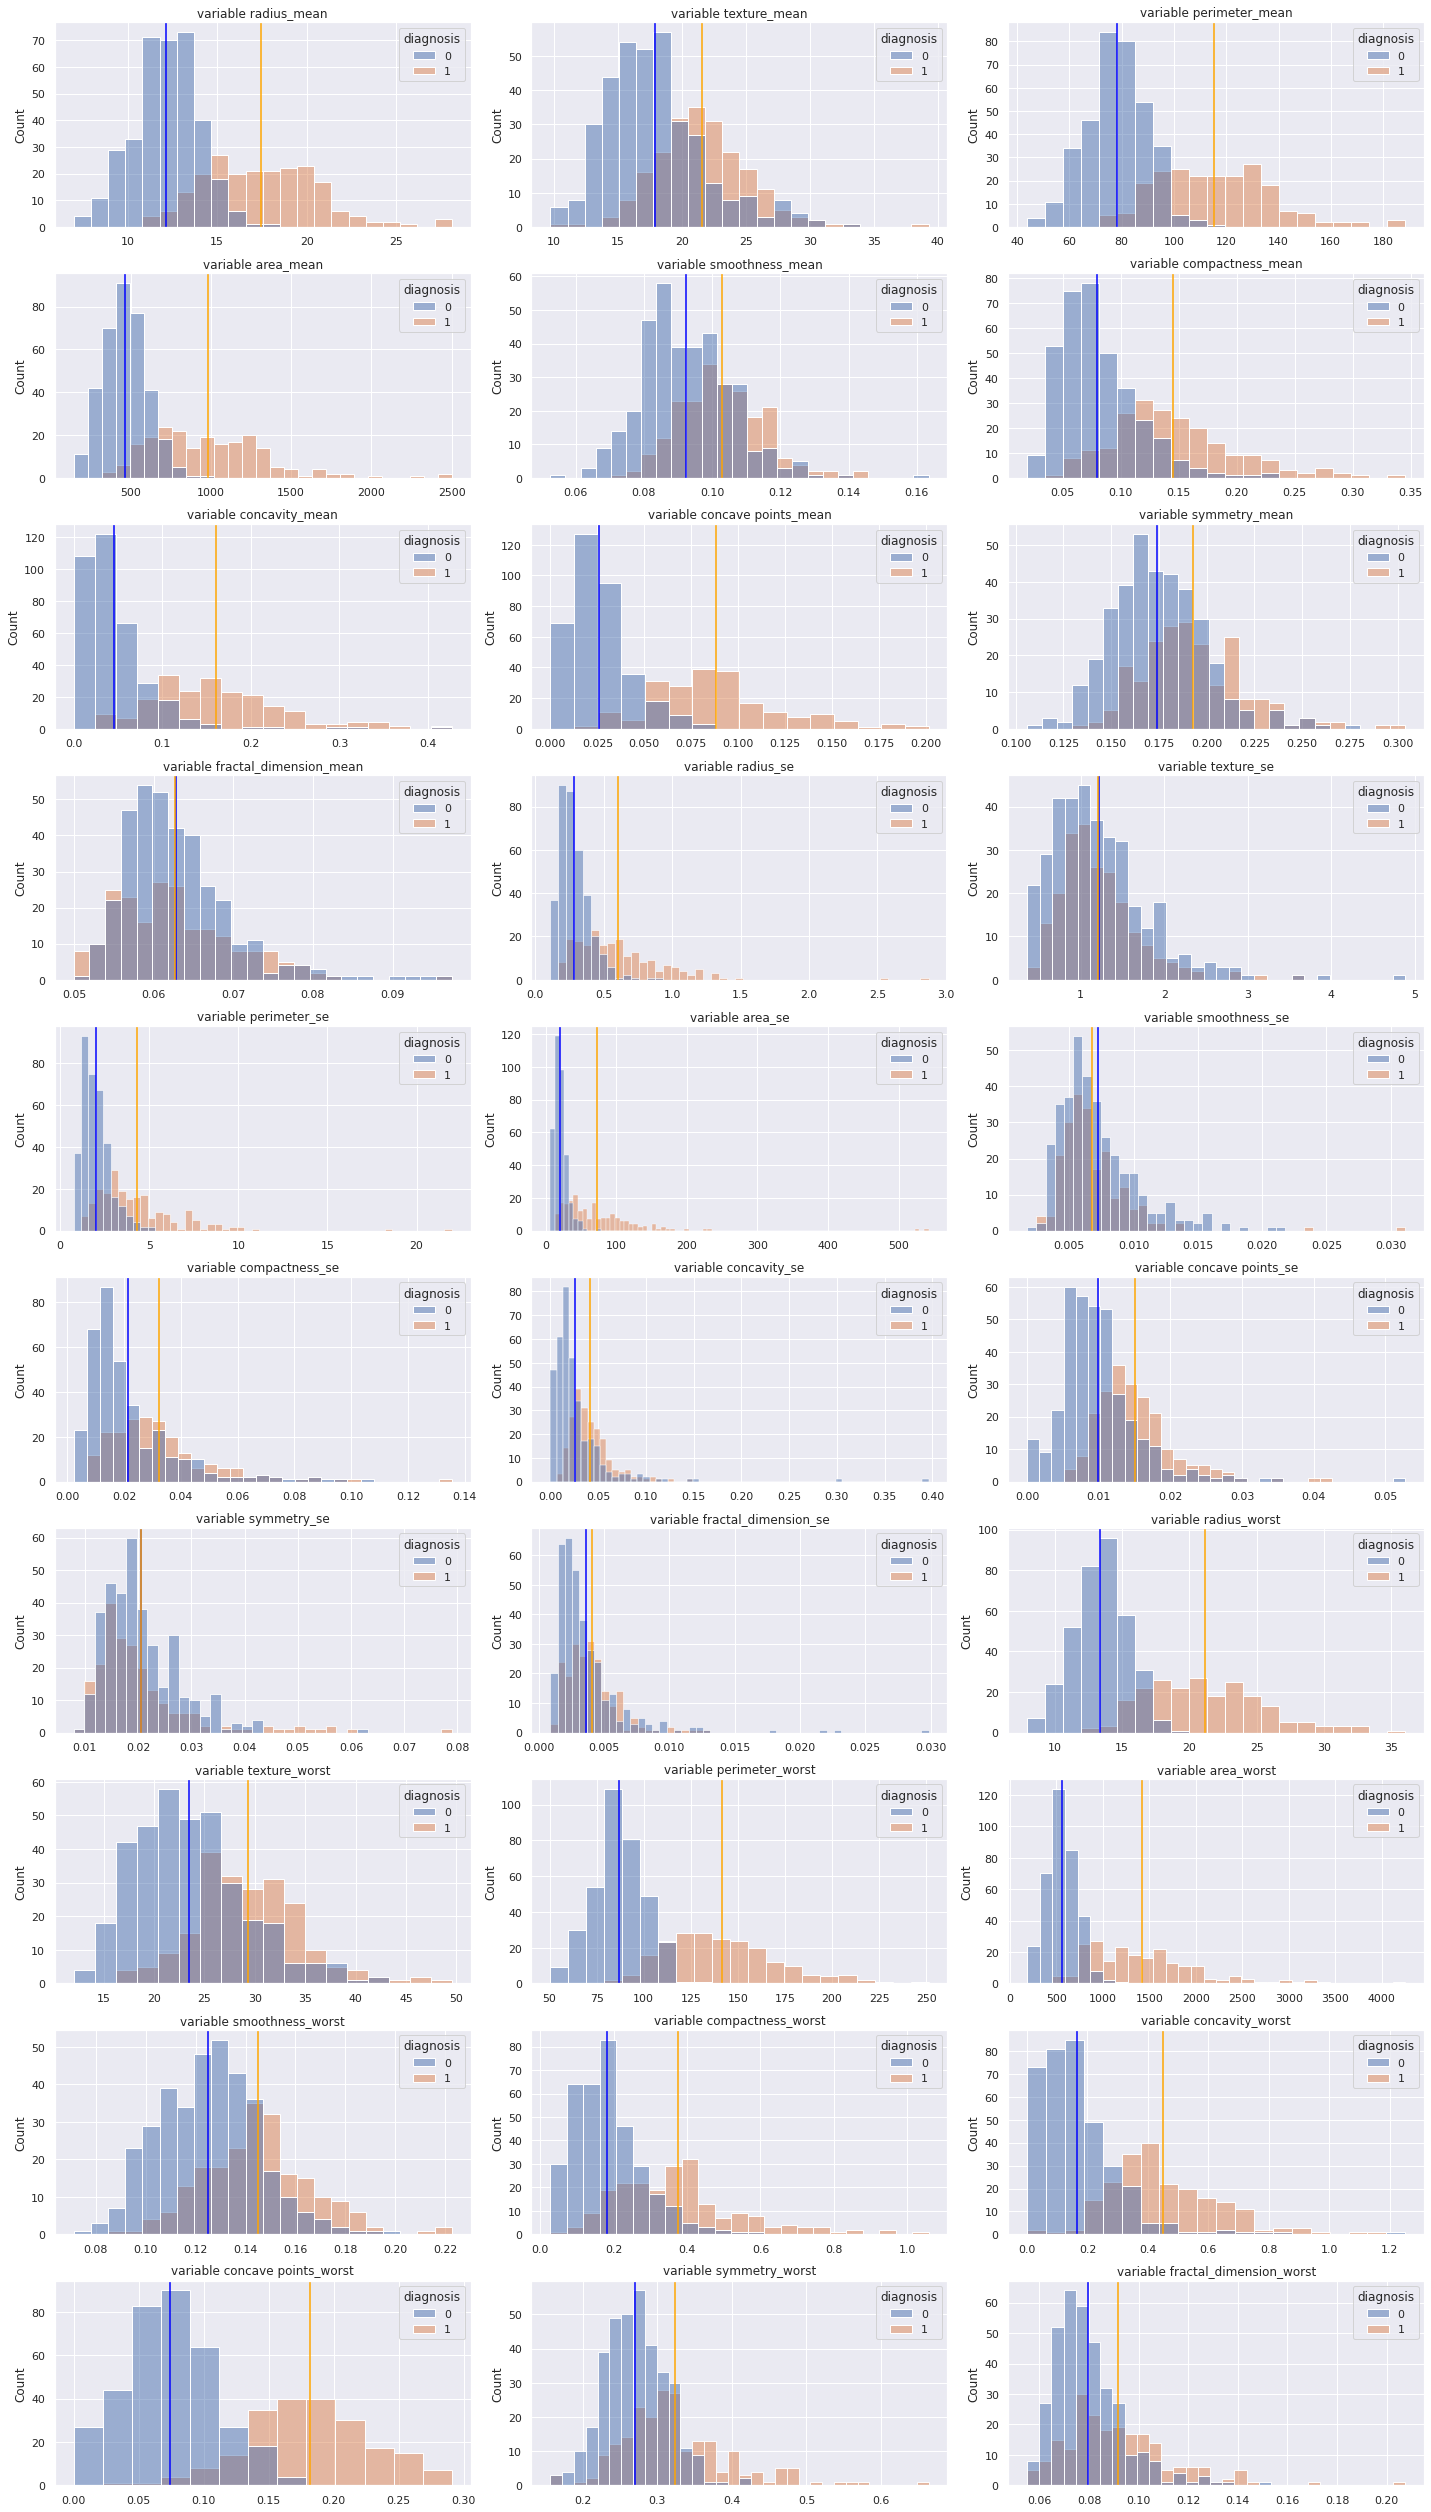

In [6]:
plt.rcParams["figure.figsize"] = (20,35)
for n, i in enumerate(df.loc[:, 'radius_mean':]):
  plt.subplot(10, 3, n+1)
  sns.histplot(data = df, x = i, hue = 'diagnosis', alpha = 0.5).set_title(f"variable {i}")
  plt.axvline(x = np.mean(df[df['diagnosis'] == 0][i]), color = 'blue') #Media de diagnosis == 0
  plt.axvline(x = np.mean(df[df['diagnosis'] == 1][i]), color = 'orange') #Media de diagnosis == 1
  plt.xlabel("")
plt.tight_layout()

## b) Reporte a grandes rasgos cuáles son los atributos con una mayor similitud en la distribución.

In [7]:
grouped = df.groupby(by = 'diagnosis').mean().T.rename(columns = {0:'0', 1:'1'})
grouped['Prop max vs min'] = np.where(grouped['0'] >=grouped['1'], grouped['0'], grouped['1'])/np.where(grouped['0'] >=grouped['1'], grouped['1'], grouped['0'])
grouped.sort_values(by = 'Prop max vs min', ascending=False)

diagnosis,0,1,Prop max vs min
concavity_mean,0.046058,0.160775,3.490730
area_se,21.135148,72.672406,3.438462
concave points_mean,0.025717,0.087990,3.421418
concavity_worst,0.166238,0.450606,2.710610
area_worst,558.899440,1422.286321,2.544798
concave points_worst,0.074444,0.182237,2.447967
perimeter_se,2.000321,4.323929,2.161617
radius_se,0.284082,0.609083,2.144035
area_mean,462.790196,978.376415,2.114082
compactness_worst,0.182673,0.374824,2.051891


**Comentario**

Las siguientes columnas tienen commo mínimo un 40% de diferencia entre la más pequeña y la más grande (porcentaje calculado sobre la más pequeña de las dos)

In [8]:
grouped.sort_values(by = 'Prop max vs min', ascending=False)[
                                                             grouped.sort_values(by = 'Prop max vs min', ascending=False)['Prop max vs min'] >=1.4
]

diagnosis,0,1,Prop max vs min
concavity_mean,0.046058,0.160775,3.490730
area_se,21.135148,72.672406,3.438462
concave points_mean,0.025717,0.087990,3.421418
concavity_worst,0.166238,0.450606,2.710610
area_worst,558.899440,1422.286321,2.544798
concave points_worst,0.074444,0.182237,2.447967
perimeter_se,2.000321,4.323929,2.161617
radius_se,0.284082,0.609083,2.144035
area_mean,462.790196,978.376415,2.114082
compactness_worst,0.182673,0.374824,2.051891


In [9]:
len(grouped.sort_values(by = 'Prop max vs min', ascending=False)[
                                                             grouped.sort_values(by = 'Prop max vs min', ascending=False)['Prop max vs min'] >=1.4
])

18

Lo cual corresponde a sólo 18 de 30 variables (60%)

# Ejercicio 3: Estimando el porcentaje de overlap en los atributos

- Parte de las virtudes de las Máquinas de Soporte Vectorial es la capacidad de lidiar con clases no separables mediante el proceso de kernelización. Resulta que un aspecto importante que muchas veces se obvia es medir la noseparabilidad de los atributos, condicional a cada clase del vector objetivo.
- El procedimiento para estimar el rango de noseparabilidad entre clases se implementa en Python de la siguiente manera:


```
def​ ​histogram_overlap​(df, attribute, target, perc=​100​):
​# get lower bound
empirical_lower_bound = np.floor(df[attribute].min())
​# get upper bound
empirical_upper_bound = np.ceil(df[attribute].max())
​# preserve histograms
tmp_hist_holder = dict()
​# for each target class
​for​ unique_value ​in​ np.unique(df[target]):
​# get histogram
tmp, _ = np.histogram(
​# for a specific attribute
df[df[target] == unique_value][attribute],
​# define percentage
bins=perc,
​# limit empirical range for comparison
range=[empirical_lower_bound, empirical_upper_bound]
) ​# append to dict
tmp_hist_holder[​"h_"​+str(unique_value)] = tmp
get_minima = np.minimum(tmp_hist_holder[​"h_1"​], tmp_hist_holder[​"h_0"​])
intersection = np.true_divide(np.sum(get_minima),
np.sum(tmp_hist_holder[​"h_0"​]))
​return​ intersection
```

- La intersección devolverá el porcentaje de comunalidad entre ambas clases, donde mayores niveles indican una mayor comunalidad.
- Utilizando la función, generará un data frame donde almacenará el nombre del atributo y su porcentaje. Ordene este data frame de forma descendente y preserve.

In [10]:
def histogram_overlap(df, attribute, target, perc=100):
  # get lower bound
  empirical_lower_bound = np.floor(df[attribute].min())
  # get upper bound
  empirical_upper_bound = np.ceil(df[attribute].max())
  # preserve histograms
  tmp_hist_holder = dict()
  #for each target class
  for unique_value in np.unique(df[target]):
  # get histogram
    tmp, _ = np.histogram(
  # for a specific attribute
    df[df[target] == unique_value][attribute],
    # define percentage
    bins=perc,
    # limit empirical range for comparison
    range=[empirical_lower_bound, empirical_upper_bound]
    )# append to dict
    tmp_hist_holder["h_"+str(unique_value)] = tmp
  get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
  intersection = np.true_divide(np.sum(get_minima),
  np.sum(tmp_hist_holder["h_0"]))
  return intersection

In [11]:
#probamos la función
histogram_overlap(df, 'fractal_dimension_mean', 'diagnosis')

0.5882352941176471

In [12]:
preserve_1 = pd.DataFrame()

for i in df.columns[1:]:
  resultado = histogram_overlap(df, i, 'diagnosis')
  preserve_1 = preserve_1.append({'variable':i, 'histogram_overlap':resultado}, ignore_index=True)
preserve_1 = preserve_1.sort_values(by = 'histogram_overlap', ascending = False)
preserve_1
#preserve_1.to_csv("ejercicio_3.csv") #Para no llenarte de archivos Álvaro hehehe

,histogram_overlap,variable
19,0.593838,fractal_dimension_se
14,0.591036,smoothness_se
9,0.588235,fractal_dimension_mean
18,0.568627,symmetry_se
11,0.549020,texture_se
15,0.523810,compactness_se
4,0.521008,smoothness_mean
8,0.509804,symmetry_mean
17,0.507003,concave points_se
29,0.492997,fractal_dimension_worst


# Ejercicio 4: Selección del modelo por GridSearchCV


## a) Entrene una serie de modelos ​SVC​ con los siguientes hiperparámetros:

    ○ C: [​0.0001​, ​0.001​, ​0.01​, ​0.1​, ​1​, ​10​, ​100​, ​1000​]​.
    ○ gamma: [​0.0000001​, ​0.0001​, ​0.001​, ​0.01​, ​0.1​, ​1​, ​10​]
    ○ Validaciones cruzadas: 10.

In [13]:
#Generamos los parámetros solicitados
params = {"C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  "gamma" : [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
                  }

model_SVC = SVC() #usamos lo valores por defecto ya que no se especifica otros hiperparámetros que los descritos arriba
model_SVC

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
#Instanceamos la grilla con los parámetros solicitados
grid = GridSearchCV(model_SVC, param_grid = params, cv = 10)

#separamos las muestras
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = "diagnosis"),
                                                    df["diagnosis"],
                                                    test_size = 0.33,
                                                    random_state = 3748)
#Wstandarizamos para mejorar el modelo lo que se pueda
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test  = std.transform(X_test)

#fiteamos (y por ende entrenamos)
grid.fit(X_train, y_train) #Notar que en el output de abajo, dice que tiene el parámetro refit=true, el cual
#permite dejar el modelo con la mejor combinación que haya encontrado la grilla

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## b) Genere un heatmap en base a los puntajes estimados con GridSearchCV

Tip:​ Vea cómo acceder a la llave ​mean_test_score​ en el diccionario ​cv_results_​.

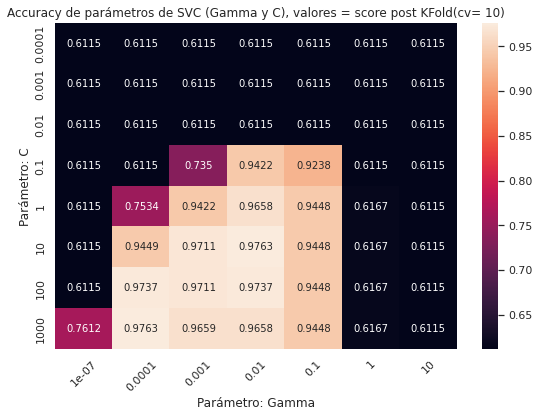

In [15]:
plt.rcParams["figure.figsize"] = (9, 6)

#generamos heatpmap
ax = sns.heatmap(grid.cv_results_["mean_test_score"].reshape(8, 7), annot = True, fmt = ".4g")

#tuneamos axis x
ax.set_xlabel("Parámetro: Gamma")
ax.set_xticklabels(params["gamma"],  rotation = 45)

#tuneamos axis y
ax.set_yticklabels(params["C"])
ax.set_ylabel("Parámetro: C")

#agregamos título!
plt.title("Accuracy de parámetros de SVC (Gamma y C), valores = score post KFold(cv= 10)");

Digresión:​ Un par de elementos a considerar en la implementación de ​GridSearchCV.

- Si trabajamos con ​sklearn.model_selection.GridSearchCV​, tan solo haciendo la división en dos muestras es suficiente, incorporando los conjuntos ​X_train y ​y_train a nuestro objeto instanciado y  preservando ​X_test e ​y_test como una muestra de validación externa. Si
tenemos un archivo de testing externo, se recomienda no hacer división.

- El objeto creado con ​sklearn.model_selection.GridSearchCV sigue la misma funcionalidad de cualquier método de estimación de scikit-learn​, con los pasos de Instanciar y Entrenar. Este objeto tendrá muchos elementos a considerar:

  ○ sklearn.model_selection.GridSearchCV.cv_results_ devolverá un diccionario donde las llaves representarán distintas métricas y los valores representarán el desempeño de cada modelo.

  ○ split​: Indicará la métrica específica en cada validación cruzada y combinación de hiper parámetros.

  ○ time​: Indicará el tiempo de ejecución en cada modelo.

  ○ Por lo general trabajaremos con ​mean_test_score y ​mean_train_score que representa la media de CV para cada combinación de hiper parámetros.

  ○ sklearn.model_selection.GridSearchCV.best_estimator_ devuelve un
  modelo listo para entrenar con la mejor combinación de hiper parámetros.

  ○ sklearn.model_selection.GridSearchCV.best_score_ devuelve el
  desempeño promedio del modelo en el testing interno. Si es un problema de clasificación devolverá ​Accuracy​, si es un problema de regresión devolverá ​MSE​.

## c) Reporte en qué rango de cada hiperparámetro el modelo presenta un desempeño eficiente. Reporte la mejor combinación de hiperparámetros y el desempeño en la muestra de entrenamiento.

**Comentarios**

Al ver el heatmap, los rangos son los siguientes:

- Para el parámetro C: desde 10 a 1.000
- Para el parámetros Gamma: desde 0.0001 a 0.1

In [16]:
#Mejor combinación de hiperparámetros para mejor desempeño acorde a esta grilla
print(f"La mejor combinación de hiperparámetros que entregó el mejor desempeño en esta grilla fue: {grid.best_params_}")
print(f"El mejor desempeño fue de: {grid.best_score_}")

La mejor combinación de hiperparámetros que entregó el mejor desempeño en esta grilla fue: {'C': 10, 'gamma': 0.01}
El mejor desempeño fue de: 0.9763157894736842


# Ejercicio 5: Validación del modelo en el hold-out sample

## a) Genere las predicciones del hold-out sample en base a la mejor combinación de hiperparámetros

In [17]:
y_predict = grid.predict(X_test)

#Notar que como dije antes, ya que cuando fiteamos el modelo usamos el parámetro "refit=True" (el cual viene por defecto así), entonces el modelo se "autoasigna" los
#mejores hiperparámetros que encontró durante la grilla, por tanto no hay que editar nada para usar la mejor combinación de hiperparámetros
y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [18]:
#Para demostrarlo compararé el desempeño fiteando el modelo "model_SVC"

model_SVC.fit(X_train, y_train)
y_predict_SVC = model_SVC.predict(X_test)

## b) Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación. Comente en qué casos el modelo presenta un desempeño deficiente.

In [19]:
print(classification_report(y_test, y_predict))
print("*"*55)
print(classification_report(y_test, y_predict_SVC))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       124
           1       0.98      0.95      0.97        64

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188

*******************************************************
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       124
           1       0.95      0.94      0.94        64

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



**Comentario**

Queda en evidencia que el modelo "model_SVC" tiene otros parámetros a los que tiene el modelo "grid", y que además, como se pudo ver cuando fiteamos el modelo "grid" viene el parámetro "refit" como True, por tanto al usar la grilla, automáticamente al terminar se colocan los mejores parámetros en el modelo basado en el mejor desempeño encontrado.